<a href="https://colab.research.google.com/github/AriyantGit/Handwritten-digit-recognition-Mnist-DataSet/blob/main/minist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout

In [31]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
import matplotlib.pyplot as plt

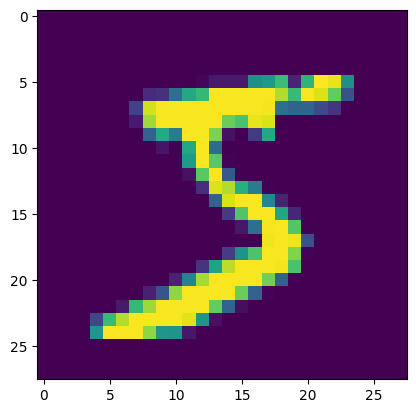

In [14]:
plt.imshow(X_train[0])

In [32]:
X_train=X_train/255
X_test=X_test/255

In [24]:
from keras.utils import to_categorical

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [62]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(10,activation="softmax"))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [65]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3909 - accuracy: 0.8821 - val_loss: 0.1528 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2002 - accuracy: 0.9407 - val_loss: 0.1222 - val_accuracy: 0.9634
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1649 - accuracy: 0.9497 - val_loss: 0.1063 - val_accuracy: 0.9687
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1395 - accuracy: 0.9572 - val_loss: 0.0983 - val_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1296 - accuracy: 0.9595 - val_loss: 0.1043 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1172 - accuracy: 0.9633 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1100 - accuracy: 0.9660 - val_loss: 0.0861 - val_accuracy:

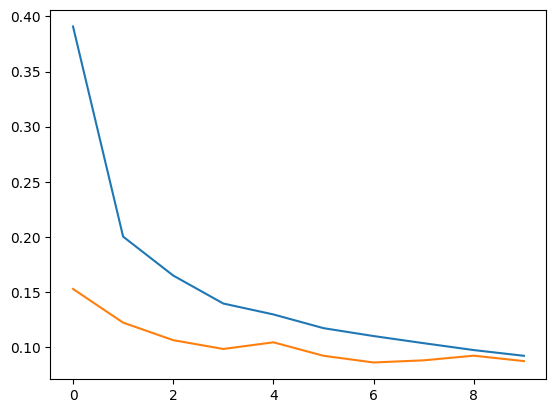

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [69]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [70]:
y_pred = y_prob.argmax(axis=1)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9772

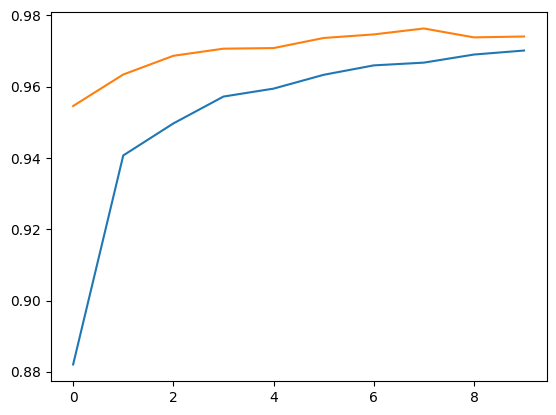

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

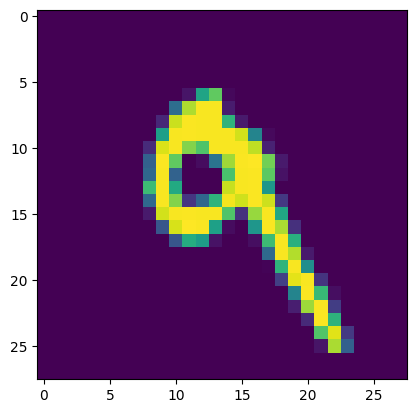

In [78]:
plt.imshow(X_test[7])

In [79]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([9])